In [125]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [126]:
img = cv2.imread('./frame_org2.png')#[...,::-1]
# img = cv2.imread('./real_life.png')#[...,::-1]

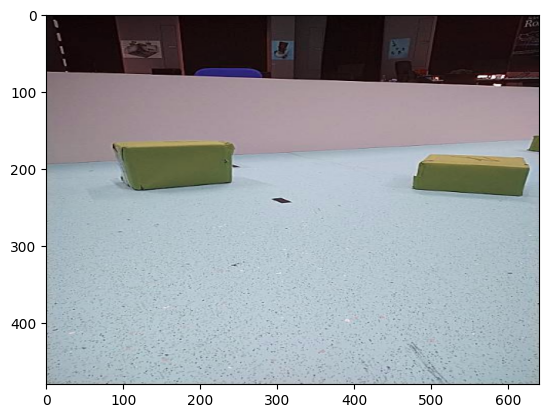

In [127]:
plt.imshow(img)

In [128]:
# Convert the image to HSV color space (Hue, Saturation, Value)
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the color ranges for green, yellow, and white in HSV
lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])

lower_yellow = np.array([15, 100, 100])
upper_yellow = np.array([30, 255, 255])

# lower_white = np.array([0, 0, 128])
# upper_white = np.array([255, 30, 255])
lower_blue = np.array([133, 145, 149])
upper_blue = np.array([156, 165, 168])
# Create masks for each color
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
#mask_white = cv2.inRange(hsv_image, lower_white, upper_white)

# Set the corresponding color values for each mask
img[mask_green > 0] = [0, 255, 0]       # Green cubes
img[mask_yellow > 0] = [0, 0, 0]      # Yellow floor
img[mask_blue > 0] = [0,0,0]

#img[mask_white > 0] = [255, 255, 255]   # White walls

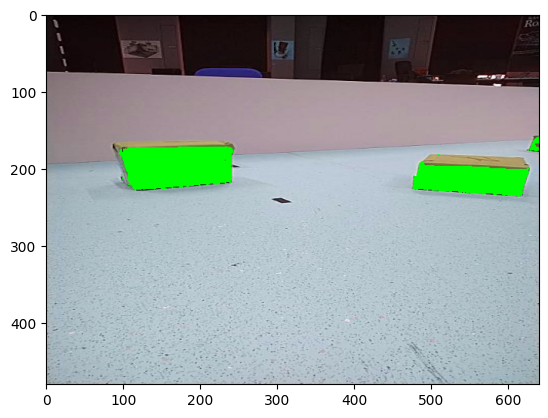

In [129]:
plt.imshow(img)

In [121]:
# Create a mask for the green color
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Find contours in the mask
contours, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
points = []
# Draw contours on the original image and calculate centroids
for contour in contours:
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

        points.append([cx,cy])
        # Draw the centroid on the image
        cv2.circle(img, (cx, cy), 5, (255, 0, 0), -1)  # Red circle

        # Print the centroid coordinates
        print(f"Green region at ({cx}, {cy})")


Green region at (106, 221)
Green region at (551, 214)
Green region at (509, 182)
Green region at (169, 197)
Green region at (634, 169)


In [122]:
width = 640
height = 480
center_point = [width//2, height//2]

In [123]:
import random
print(-(random.random()*1.6)-0.8, (random.random()*1.6)-0.048, 0.03)

-1.393455157271861 1.168943057273818 0.03
